# Cleaning and drop features


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder



df = pd.read_csv('../data/data_cleaned.csv', sep=',')

# Mostra valori unici della colonna target (per sicurezza)
print("Target values:", df['Target'].unique())

# Filtro solo le classi Graduate e Dropout
df = df[df['Target'].isin(['Graduate', 'Dropout'])].copy()

# encode target variable: 0: dropout, 1: enrolled, 2: graduated
le = LabelEncoder()
df['Target_encoded'] = le.fit_transform(df['Target'])

# Drop 'Target' variable
df.drop('Target', axis = 1, inplace = True)

# # Change data types of columns that should be categorical
# col = ['Marital_status', 'Application_mode', 'Course', 'Previous_qualification',
#        'Mother_qualification', 'Father_qualification', 'Mother_occupation',
#        'Father_occupation','Target_encoded']

# df[col] = df[col].astype('category')

stud_selected = df.drop(['Nationality', 'International', 'Educational_special_needs',], axis = 1)  
stud_selected.info()


Target values: ['Dropout' 'Graduate' 'Enrolled']
<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                3630 non-null   int64  
 1   Application_mode                              3630 non-null   int64  
 2   Application_order                             3630 non-null   int64  
 3   Course                                        3630 non-null   int64  
 4   Daytime/evening_attendance                    3630 non-null   int64  
 5   Previous_qualification                        3630 non-null   int64  
 6   Previous_qualification_grade                  3630 non-null   float64
 7   Mother_qualification                          3630 non-null   int64  
 8   Father_qualification                          3630 non-null   int64  
 9   Mother_occupation  

# Data splitting

X_train shape: (2722, 33)
X_test shape: (908, 33)
y_train shape: (2722,)
y_test shape: (908,)


C:\Users\Martina\AppData\Local\Temp\ipykernel_6380\2836981305.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(Percentage=100 * x['Count'] / x['Count'].sum()))


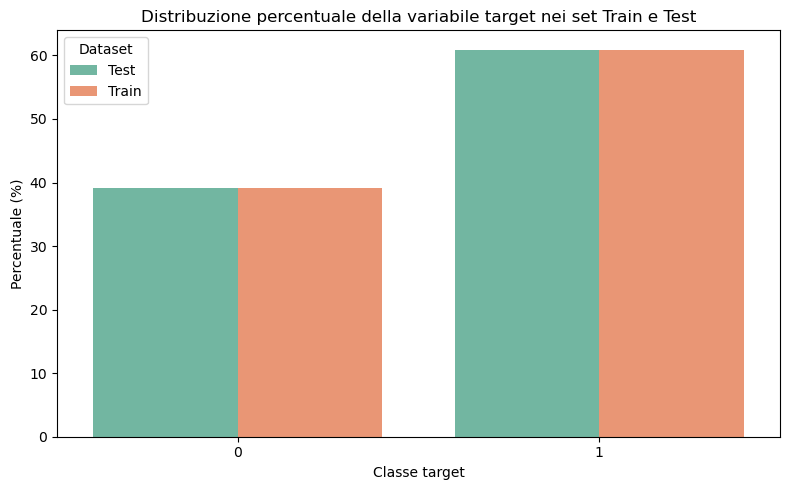

In [2]:
from sklearn.model_selection import train_test_split

X = stud_selected.drop('Target_encoded', axis=1)  
y = stud_selected['Target_encoded']  

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# === Visualizzazione distribuzione target ===
# Ricrea il DataFrame con etichette
dist_df = pd.DataFrame({
    'Set': ['Train'] * len(y_train) + ['Test'] * len(y_test),
    'Target': pd.concat([y_train, y_test])
})

# Calcola le percentuali
percent_df = (
    dist_df.value_counts(['Set', 'Target'])
    .reset_index(name='Count')
    .groupby('Set')
    .apply(lambda x: x.assign(Percentage=100 * x['Count'] / x['Count'].sum()))
    .reset_index(drop=True)
)

# Plot percentuale
plt.figure(figsize=(8, 5))
sns.barplot(data=percent_df, x='Target', y='Percentage', hue='Set', palette='Set2')
plt.title('Distribuzione percentuale della variabile target nei set Train e Test')
plt.xlabel('Classe target')
plt.ylabel('Percentuale (%)')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

# Model comparison

  File "c:\Users\Martina\anaconda3\envs\DMML\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 1656, number of negative: 1656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4813
[LightGBM] [Info] Number of data points in the train set: 3312, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1656, number of negative: 1656
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4813
[LightGBM] [Info] Number of data points in the train set: 3312, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1656, number of negative: 1656
[LightGBM] [Info] Auto-choosing row-wise multi-threading, t

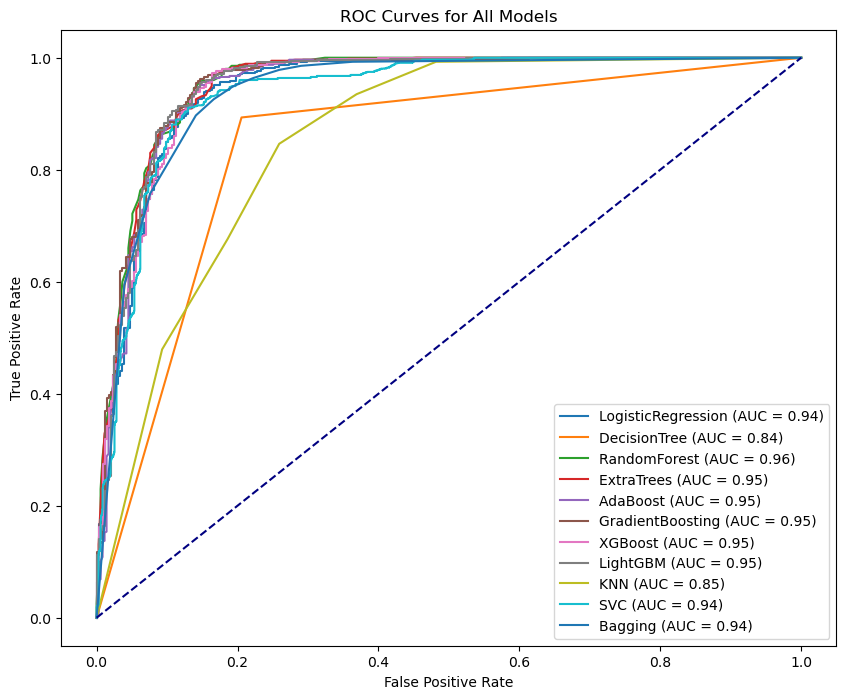

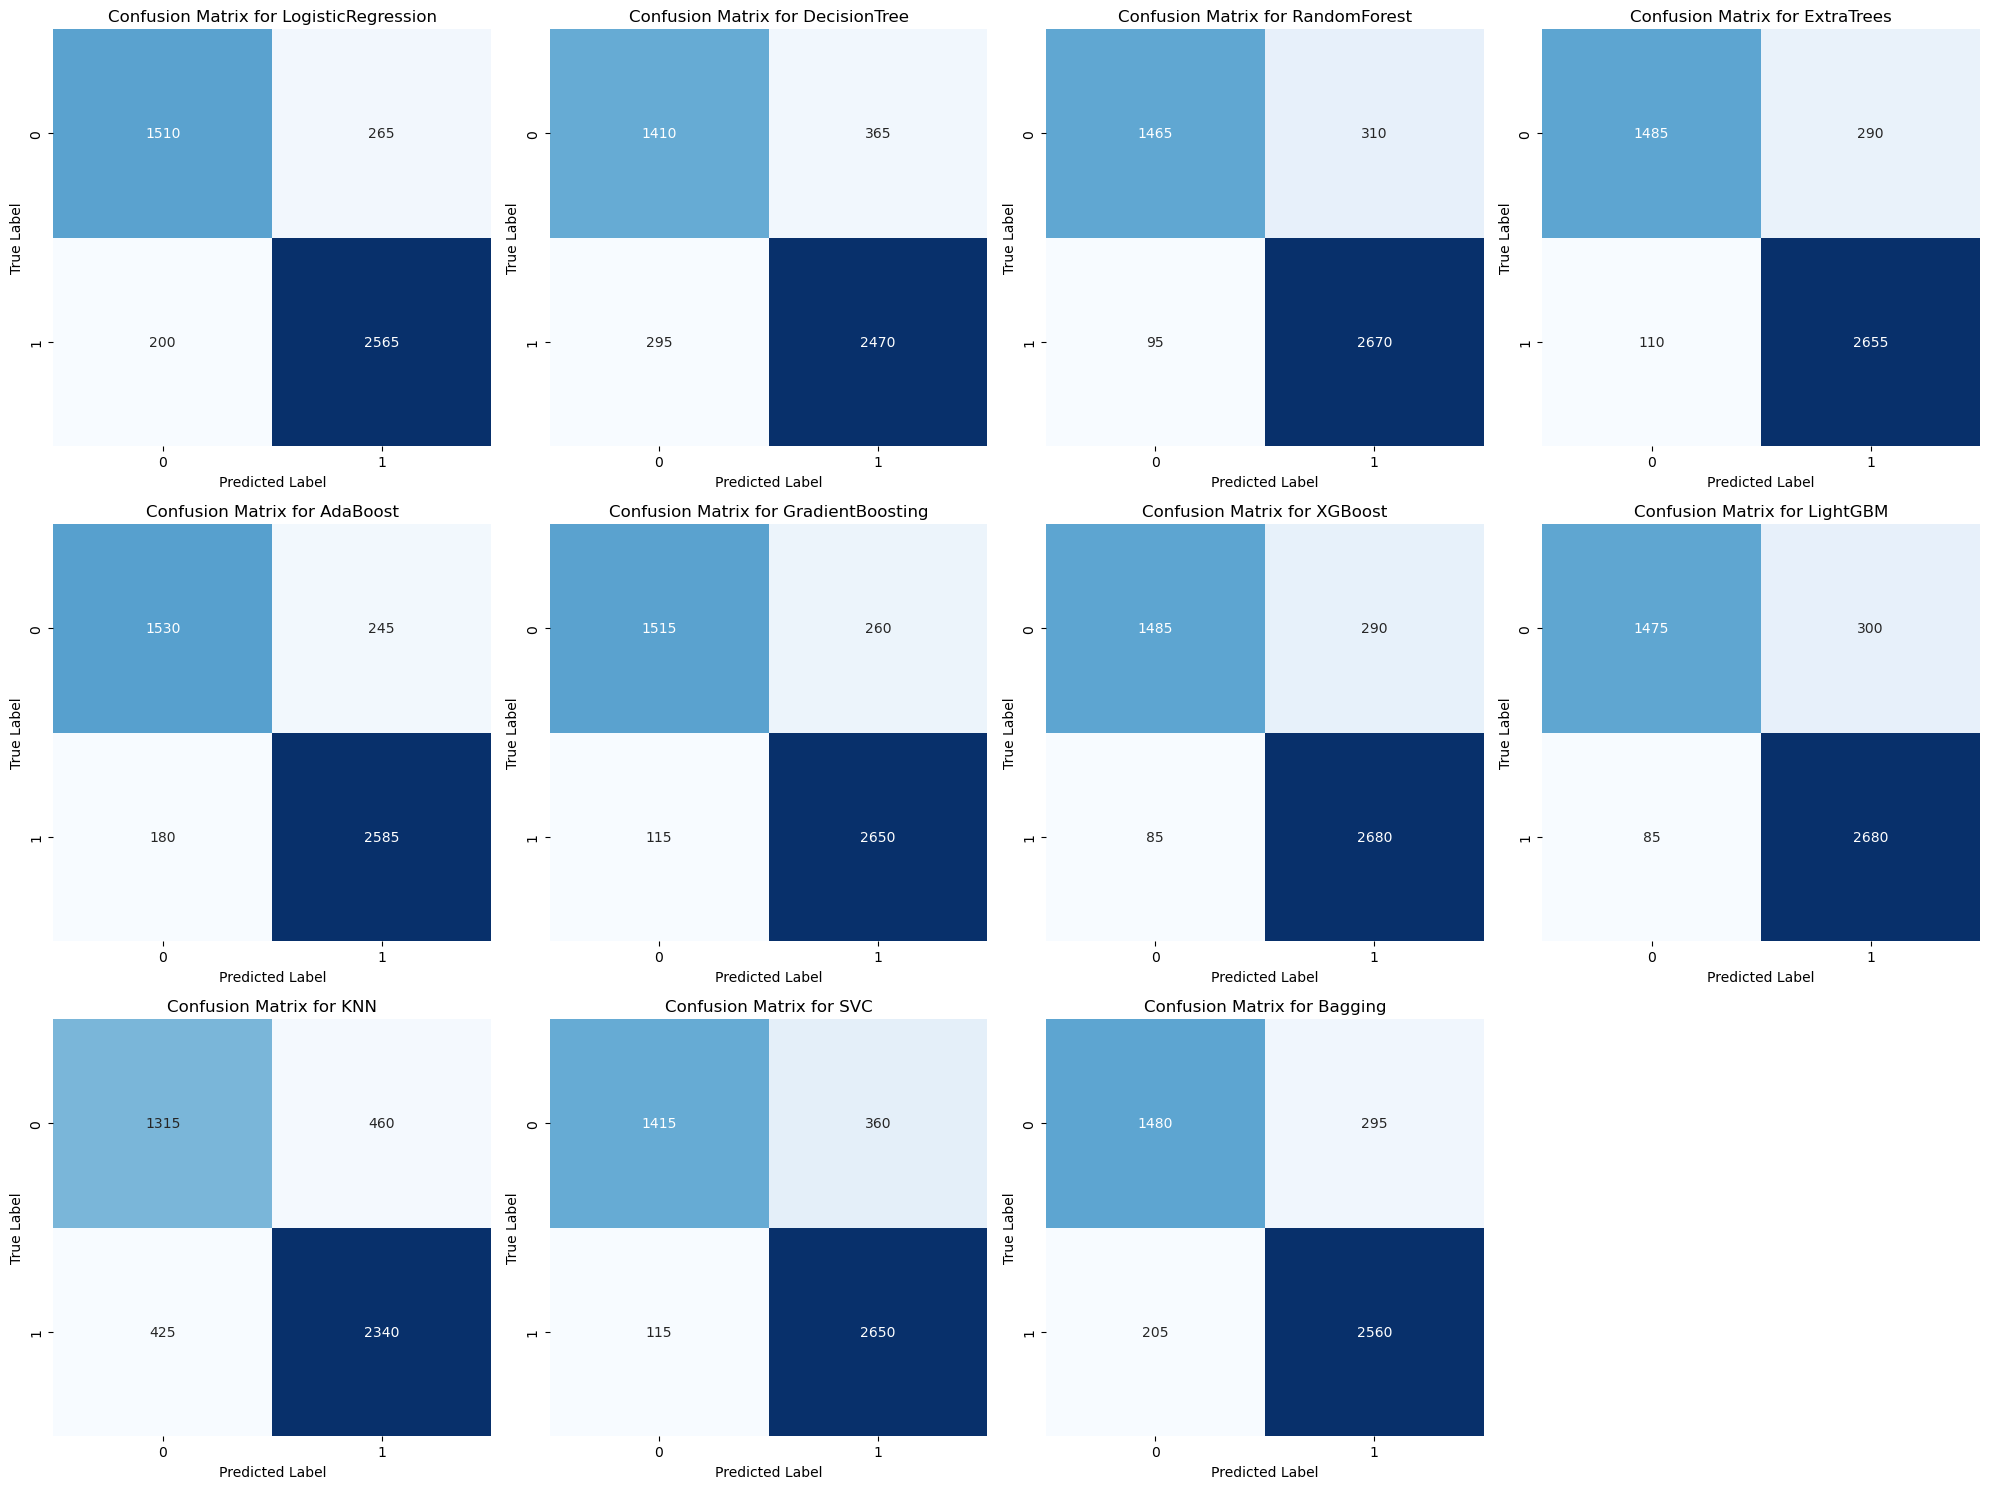

In [5]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier, GradientBoostingClassifier,
                              BaggingClassifier, VotingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy.stats import wilcoxon
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from FeaturesTrasformer import FeaturesTransformer
from preprocessor import preprocessor

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



# --- Model 
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel="rbf", probability=True),
    "Bagging": BaggingClassifier(random_state=42)
    
}

# Define scoring metrics for cross_validate
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc' ]

# Perform cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize dictionaries to store results
model_scores = {}      # To store per-fold scores for statistical tests
roc_curves = {}        # To store ROC curve data for each model
conf_matrices = {}     # To store confusion matrices for each model

all_results = []

# Esegui TimeSeriesSplit per ognuno dei modelli
for model_name, model in models.items():

    pipeline = Pipeline(steps=[
        ('feature_transformer', FeaturesTransformer(drop_originals=True)),
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    y_true = []
    y_pred = []
    y_prob = []

    # Custom cross-validation loop
    for train_idx, test_idx in skf.split(X_train, y_train):
        X_fold_train = X_train.iloc[train_idx]
        y_fold_train = y_train.iloc[train_idx]
        X_fold_test = X_train.iloc[test_idx]
        y_fold_test = y_train.iloc[test_idx]

        
        # Fit the pipeline on training data
        pipeline.fit(X_train, y_train)
        
        # Predict on test data
        y_pred_fold = pipeline.predict(X_test)
        y_prob_fold = pipeline.predict_proba(X_test)[:, 1]
        
        # Store results
        y_true.extend(y_test)
        y_pred.extend(y_pred_fold)
        y_prob.extend(y_prob_fold)
    
    # Convert lists to NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)

    # Calculate overall metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)

    # Store results
    all_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
    })

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrices[model_name] = conf_matrix

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_curves[model_name] = (fpr, tpr, roc_auc)

results_df = pd.DataFrame(all_results)

# Plot all ROC curves together
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, roc_auc_value) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices in a grid
num_models = len(models)
cols = 4  # Number of columns in the grid
rows = num_models // cols + int(num_models % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
axes = axes.flatten()  # Flatten in case we have only one row

for idx, (model_name, conf_matrix) in enumerate(conf_matrices.items()):
    ax = axes[idx]
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Remove any unused subplots
for idx in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [11]:
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,RandomForest,0.920705,0.904202,0.972875,0.937282,0.956483
6,XGBoost,0.918502,0.901173,0.972875,0.935652,0.947268
5,GradientBoosting,0.914097,0.907376,0.956600,0.931338,0.954064
7,LightGBM,0.911894,0.893511,0.971067,0.930676,0.950483
3,ExtraTrees,0.909692,0.899830,0.958409,0.928196,0.952291
9,SVC,0.909692,0.902564,0.954792,0.927944,0.955432
0,LogisticRegression,0.899780,0.908127,0.929476,0.918677,0.943642
4,AdaBoost,0.899780,0.913978,0.922242,0.918092,0.944895
10,Bagging,0.893172,0.901408,0.925859,0.913470,0.932494
1,DecisionTree,0.867841,0.870085,0.920434,0.894552,0.853175


# Model evaluation

In [3]:
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from FeaturesTrasformer import FeaturesTransformer
from preprocessor import preprocessor

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pipeline = Pipeline(steps=[
    ('feature_transformer', FeaturesTransformer(drop_originals=True)),     # Feature engineering
    ('preprocessor', preprocessor),                            # Preprocessing
    ('smote', SMOTE(random_state=42)),                                  # Apply SMOTE to balance the classes
    ('model', RandomForestClassifier(random_state=42))                  # The current model
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC AUC': [roc_auc]
})
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Random Forest,0.910793,0.895973,0.965642,0.929504,0.895497


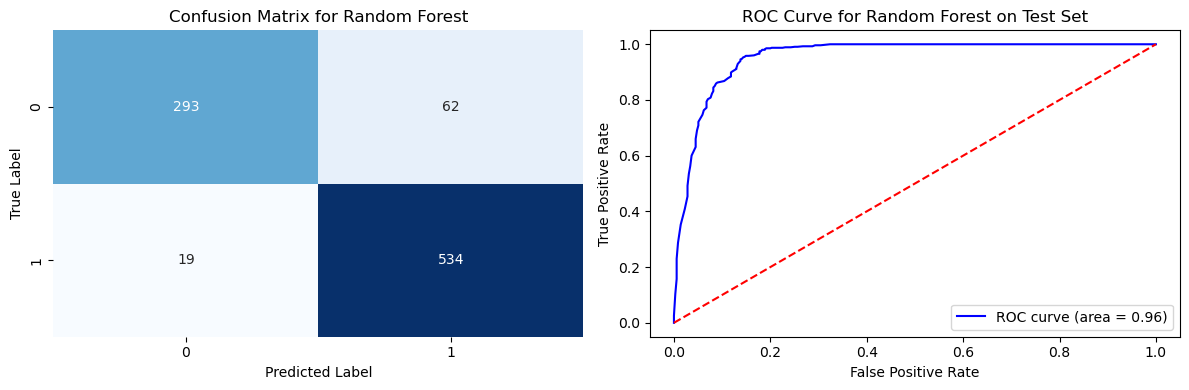

In [4]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

cm = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjust the figsize to make it compact

# Plot the Confusion Matrix on the first subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title(f'Confusion Matrix for Random Forest')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot the ROC curve on the second subplot
axes[1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_value:.2f})')
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title(f'ROC Curve for Random Forest on Test Set')
axes[1].legend(loc="lower right")

# Show the combined plots
plt.tight_layout()
plt.show()

# Grid Search CV

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
param_grid = {
    "model__n_estimators":     [200, 300, 500],
    "model__max_depth":        [None, 10, 20, 30],
    "model__max_features":     ["sqrt", "log2"],
    "model__min_samples_split":[2, 5, 10]
}

scoring = {
    'roc_auc': 'roc_auc',
    'recall': 'recall'
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring,refit='recall', cv=skf, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best recall: ", grid_search.cv_results_['mean_test_recall'].max())
print("Best ROC AUC: ", grid_search.cv_results_['mean_test_roc_auc'].max())

Best parameters found:  {'model__max_depth': 30, 'model__max_features': 'log2', 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best recall:  0.9522913405889419
Best ROC AUC:  0.9574058129306664


# Fine tuned model evaluation

In [3]:
# Let's define the model with the best parameters and rerun it
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from FeaturesTrasformer import FeaturesTransformer
from preprocessor import preprocessor

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Best parameters from grid search for RandomForest
best_params = {
    'max_depth': 30,
    'max_features': 'log2',
    'n_estimators': 200,
    'min_samples_split': 2
}

# Define the pipeline with the best model parameters
best_pipeline = Pipeline(steps=[
    ('feature_transformer', FeaturesTransformer(drop_originals=True)),  # Feature engineering
    ('preprocessing', preprocessor),                                 # Preprocessing 
    ('smote', SMOTE(random_state=42)),                               # Balancing classes using SMOTE
    ('model', RandomForestClassifier(random_state=42, **best_params))  # The best model
])

# Fit the model on the training data
best_pipeline.fit(X_train, y_train)

# Predictions
y_pred = best_pipeline.predict(X_test)
y_prob = best_pipeline.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# create a dataframe to store the results
results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC AUC': [roc_auc]
})
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Random Forest,0.911894,0.904274,0.9566,0.929701,0.899427


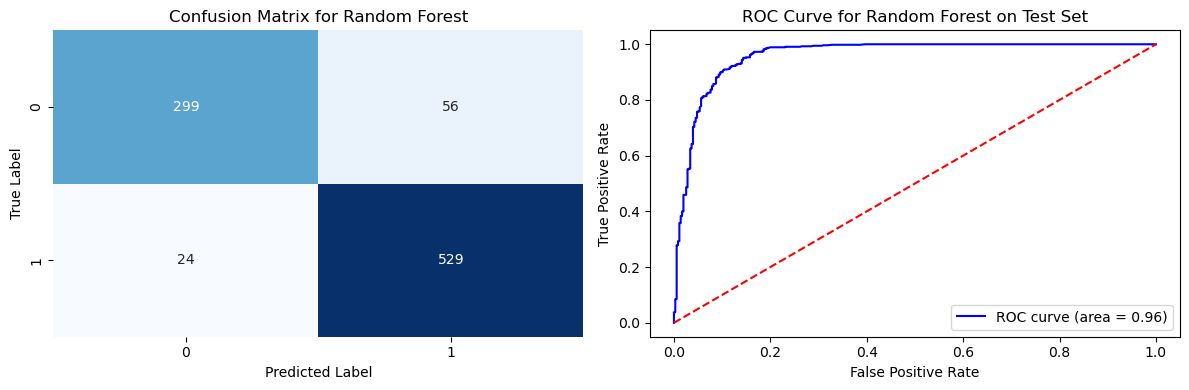

In [5]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjust the figsize to make it compact

# Plot the Confusion Matrix on the first subplot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title(f'Confusion Matrix for Random Forest')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot the ROC curve on the second subplot
axes[1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_value:.2f})')
axes[1].plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title(f'ROC Curve for Random Forest on Test Set')
axes[1].legend(loc="lower right")

# Show the combined plots
plt.tight_layout()
plt.show()

# Feature importance

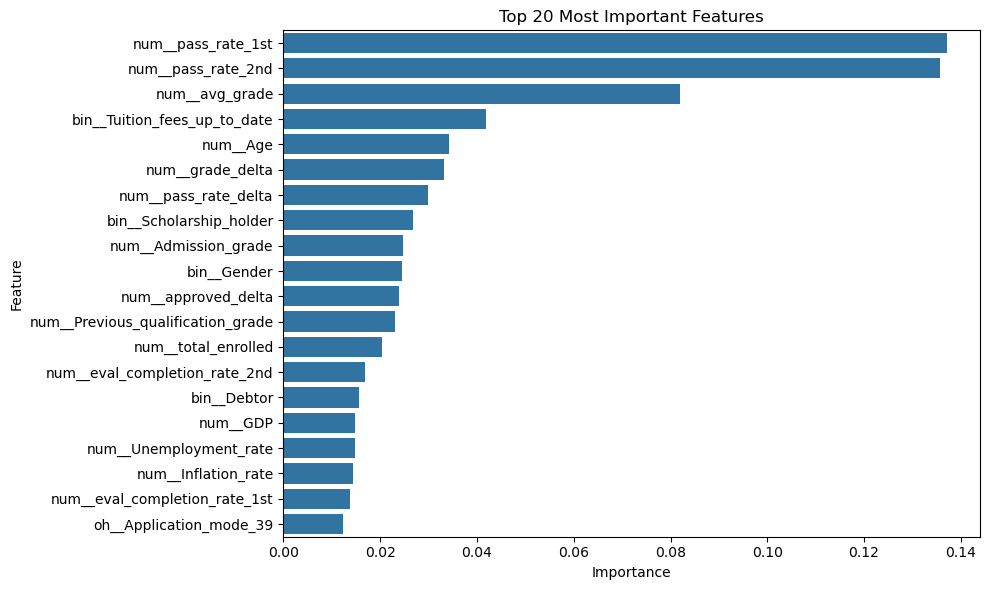

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model = best_pipeline.named_steps['model']

# Estrai importanza e crea un DataFrame
feature_importances = model.feature_importances_
features = X_train.columns

feature_names = best_pipeline.named_steps['preprocessing'].get_feature_names_out()

# Crea il DataFrame per la feature importance

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot delle feature più importanti
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title("Top 20 Most Important Features")
plt.tight_layout()
plt.show()


SHAP values shape: (908, 197, 2)
X_shap shape: (908, 197)


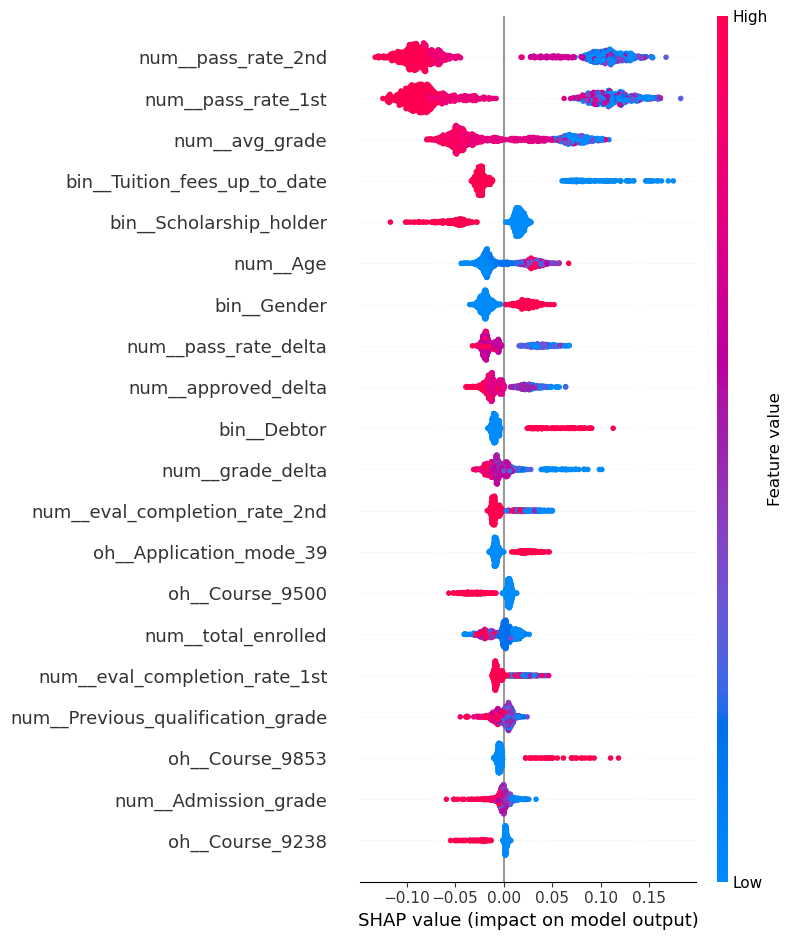

In [35]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1 – Trasforma X_test con feature engineering e preprocessing
X_test_fe = best_pipeline.named_steps['feature_transformer'].transform(X_test)
X_test_processed = best_pipeline.named_steps['preprocessing'].transform(X_test_fe)

# Step 2 – Rendi denso se necessario
if hasattr(X_test_processed, "toarray"):
    X_test_processed = X_test_processed.toarray()

# Step 3 – Ottieni nomi delle feature
feature_names = best_pipeline.named_steps['preprocessing'].get_feature_names_out()

# Step 4 – Crea DataFrame
X_shap = pd.DataFrame(X_test_processed, columns=feature_names)

# Step 5 – Crea explainer e calcola shap_values
model = best_pipeline.named_steps['model']
explainer = shap.TreeExplainer(model)

# ✅ IMPORTANTE: usa X_shap qui, non feature_names!
shap_values = explainer(X_shap)


# Step 6 – Verifica le shape
print("SHAP values shape:", shap_values.shape)  # dovrebbe essere (908, 197)
print("X_shap shape:", X_shap.shape)              # (908, 197)

# Step 7 – Visualizza per classe 0 (Dropout)
output_to_explain = 0
shap.summary_plot(shap_values[:, :, output_to_explain], X_shap, max_display=20)


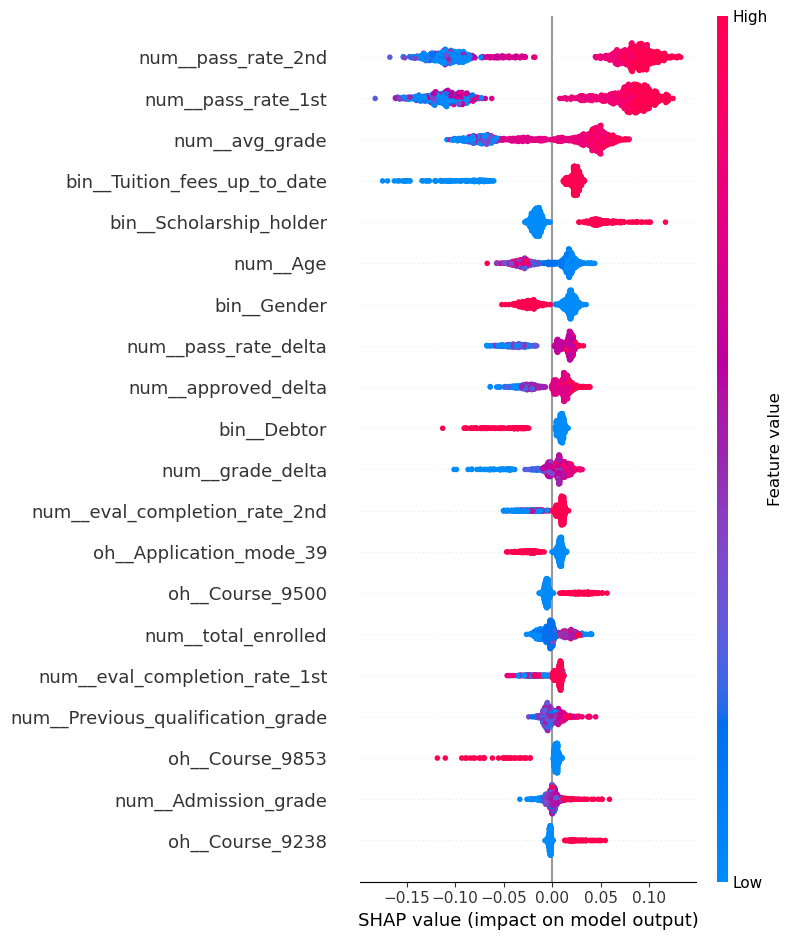

In [21]:
output_to_explain = 1
shap.summary_plot(shap_values[:, :, output_to_explain], X_shap, max_display=20)

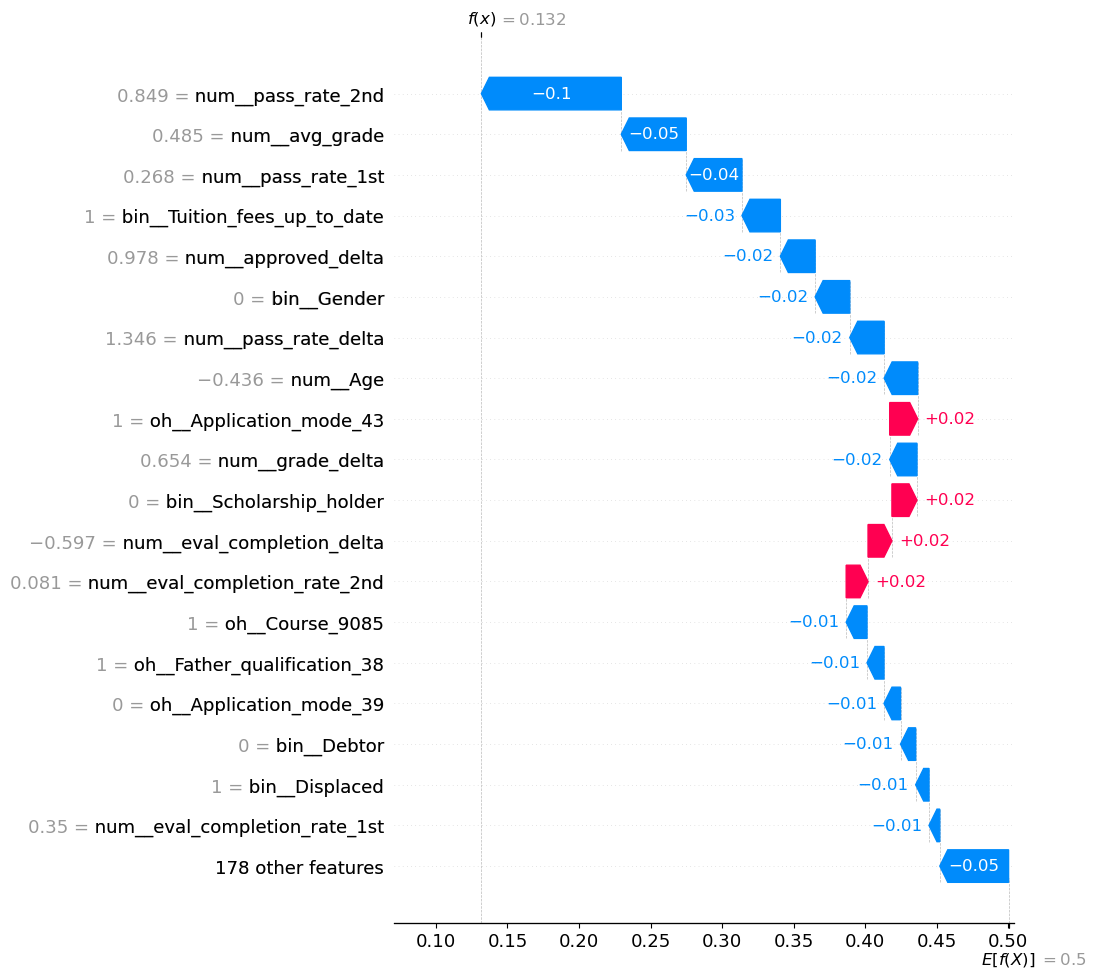

In [32]:
object_id_to_review = 20
shap.plots.waterfall(shap_values[object_id_to_review, :, output_to_explain], max_display=20)

In [18]:
# load JS visualization code to notebook
shap.initjs()


# visualize the first prediction's explanation
shap.plots.force(shap_values[object_id_to_review,:,output_to_explain])

Per ogni studente nel X_test, possiamo creare:

✅ Predizione finale: probabilità di dropout

📊 Top 5 feature più impattanti (SHAP)

⚖️ Force plot della predizione

📝 Testo esplicativo automatico in linguaggio naturale

🔍 (Opzionale) Comparazione con altri studenti simili

In [64]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML

# --- Seleziona uno studente ---
i = 20  # oppure usa np.random.randint(0, len(X_test))

# Feature engineering + preprocessing
X_fe = best_pipeline.named_steps['feature_transformer'].transform(X_test.iloc[[i]])
X_proc = best_pipeline.named_steps['preprocessing'].transform(X_fe)
if hasattr(X_proc, "toarray"):
    X_proc = X_proc.toarray()

# Feature names
feature_names = best_pipeline.named_steps['preprocessing'].get_feature_names_out()
X_df = pd.DataFrame(X_proc, columns=feature_names)

# SHAP explainer
model = best_pipeline.named_steps['model']
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_df)

# Probabilità predetta
proba = model.predict_proba(X_df)[0][0]  # Classe 0 = Dropout


# Calcola le prime 5 feature più impattanti (in valore assoluto)
shap_vals = shap_values.values[0, :, 0] if hasattr(shap_values, "values") else shap_values[0, :, 0]
top_features = np.argsort(np.abs(shap_vals))[::-1][:5]
feature_impattanti = [feature_names[idx] for idx in top_features]

explanation = (
    "The student has a dropout probability of {:.0f}%. "
    "The features that most affect prediction are:\n"
    "- {} \n" 
    "- {} \n" 
    "- {} \n" 
    "- {} \n" 
    "- {} " 
).format(
    proba * 100,
    feature_impattanti[0], 
    feature_impattanti[1], 
    feature_impattanti[2], 
    feature_impattanti[3], 
    feature_impattanti[4] 
)

print(explanation)

# Force plot
shap.initjs()
shap.plots.force(shap_values[:,:,0], show=True)


The student has a dropout probability of 13%. The features that most affect prediction are:
- num__pass_rate_2nd 
- num__avg_grade 
- num__pass_rate_1st 
- bin__Tuition_fees_up_to_date 
- num__approved_delta 
